<a href="https://colab.research.google.com/github/Marisolar28/Investigacion_acerca_de_GitHub/blob/git_branch/HT_3_Sandy_Ajcabul_21001820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 3.
Descargue el Dataset (de click aquı para descargar) el cual contiene aproximadamente 800,000 tweets de diversos temas. Usando CoLab y expresiones regulares. Determine los 3 usuarios mas populares dentro del
dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:
Content: Tweet.
Metadata: ID, Timestamp, Length (este valor hay que calcularlo)
Posterior a tener sus 3 corpus creados, responda: ¿Razon por la que citan a ese usuario? para
esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que mas rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo
de datos que estan disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:
1. Remover stopwords.
2. Realizar stemming y lemmatizacion.
3. Mostrar un wordcloud con el top 10 para cada usuario.

In [22]:
import pandas as pd
import csv
import re
from collections import defaultdict

In [24]:
from google.colab import files
datos = files.upload()

Saving tw_source.csv to tw_source (1).csv


In [25]:
# Abre el archivo CSV original en modo lectura
with open("tw_source.csv", 'r', encoding='ISO-8859-1') as archivo_original:
    # Lee los datos del archivo original
    datos_originales = list(csv.reader(archivo_original))

# Define el encabezado que deseas agregar
encabezado = ['Number','ID', 'Timestamp', 'Query', 'User', 'Tweet']

# Abre un nuevo archivo CSV en modo escritura
with open('archivo_con_encabezados.csv', 'w', newline='') as archivo_con_encabezados:
    # Crea un escritor CSV para escribir en el nuevo archivo
    escritor_csv = csv.writer(archivo_con_encabezados)

    # Escribe el encabezado en el nuevo archivo
    escritor_csv.writerow(encabezado)

    # Escribe los datos originales en el nuevo archivo
    escritor_csv.writerows(datos_originales)

print("Encabezado agregado con éxito al archivo CSV.")


Encabezado agregado con éxito al archivo CSV.


In [26]:
df= pd.read_csv("archivo_con_encabezados.csv",encoding='latin-1')
df

,Number,ID,Timestamp,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [27]:
# Contar la frecuencia de cada usuario
user_frequency = df['User'].value_counts()

# Seleccionar los 3 usuarios más populares
top_users = user_frequency.head(3)

print("Los 3 usuarios más populares son:")
print(top_users)

Los 3 usuarios más populares son:
lost_dog    549
webwoke     345
tweetpet    310
Name: User, dtype: int64


In [33]:

corpus = defaultdict(list)

for index, row in df.iterrows():
    usuario = row['User']
    tweet = row['Tweet']
    tweet_id = row['ID']
    timestamp = row['Timestamp']

    # Calcular la longitud del tweet
    length = len(tweet)

    # Agregar la información al corpus del usuario actual
    corpus[usuario].append({
        'Content': tweet,
        'Metadata': {
            'ID': tweet_id,
            'Timestamp': timestamp,
            'Length': length
        }
    })

# Mostrar el corpus generado para los 3 usuarios más populares
for usuario, tweets in corpus.items():
    if usuario in top_users.index:
        print(f"Usuario: {usuario}")
        for tweet_data in tweets:
            print(tweet_data)
        print("\n")


Usuario: tweetpet
{'Content': '@tweetchild  Clean Me!', 'Metadata': {'ID': 1548797240, 'Timestamp': 'Fri Apr 17 22:00:01 PDT 2009', 'Length': 22}}
{'Content': '@tweetchild  Clean Me!', 'Metadata': {'ID': 1548797247, 'Timestamp': 'Fri Apr 17 22:00:01 PDT 2009', 'Length': 22}}
{'Content': '@chromachris  Clean Me!', 'Metadata': {'ID': 1548797393, 'Timestamp': 'Fri Apr 17 22:00:02 PDT 2009', 'Length': 23}}
{'Content': '@reatlas  Clean Me!', 'Metadata': {'ID': 1548797501, 'Timestamp': 'Fri Apr 17 22:00:03 PDT 2009', 'Length': 19}}
{'Content': '@chromachris  Clean Me!', 'Metadata': {'ID': 1548797565, 'Timestamp': 'Fri Apr 17 22:00:03 PDT 2009', 'Length': 23}}
{'Content': '@reatlas  Clean Me!', 'Metadata': {'ID': 1548797648, 'Timestamp': 'Fri Apr 17 22:00:04 PDT 2009', 'Length': 19}}
{'Content': '@reatlas  hungry!', 'Metadata': {'ID': 1548797891, 'Timestamp': 'Fri Apr 17 22:00:06 PDT 2009', 'Length': 17}}
{'Content': '@adlantis  Clean Me!', 'Metadata': {'ID': 1551797396, 'Timestamp': 'Sat Apr

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


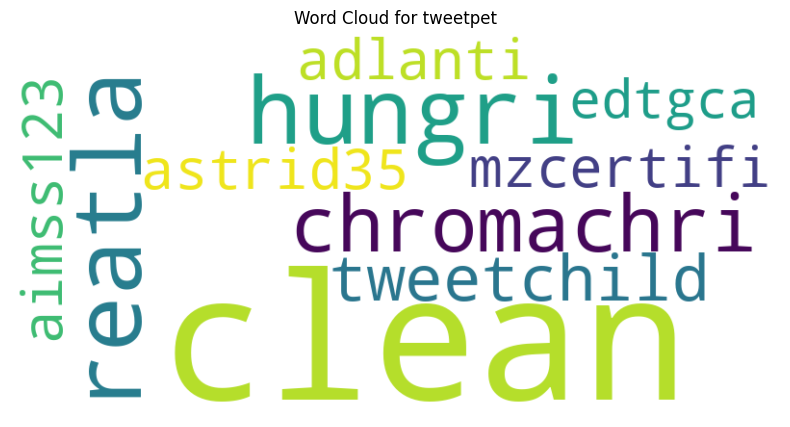

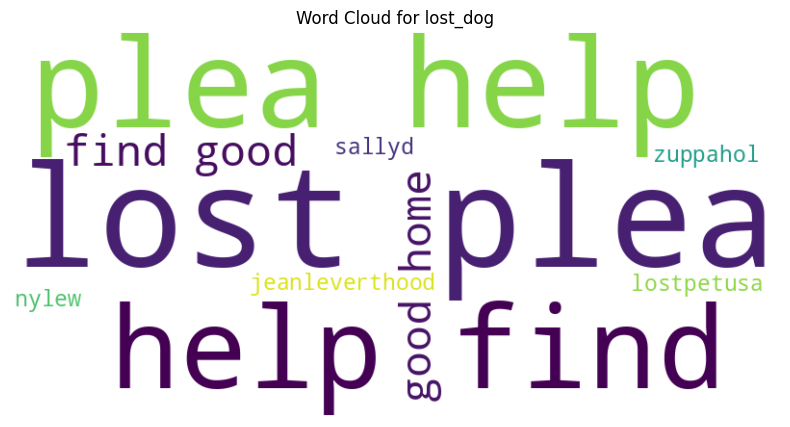

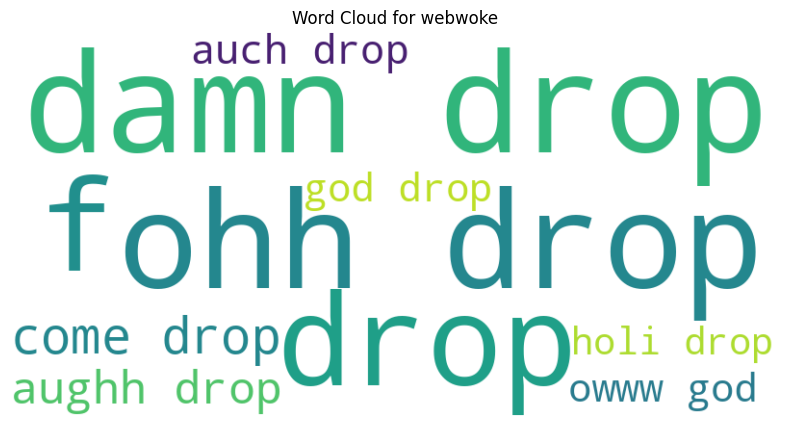

In [35]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar los recursos necesarios de NLTK (solo una vez)
nltk.download('stopwords')
nltk.download('wordnet')

# Definir stopwords y crear objetos para stemming y lemmatización
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Crear funciones para preprocesar texto
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Procesar los tweets de cada usuario
for usuario, tweets in corpus.items():
    if usuario in top_users.index:
        tweet_text = ' '.join([tweet['Content'] for tweet in tweets])

        # Preprocesar el texto
        cleaned_text = preprocess_text(tweet_text)

        # Generar un wordcloud
        wordcloud = WordCloud(width=800, height=400, max_words=10, background_color='white').generate(cleaned_text)

        # Mostrar el wordcloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {usuario}")
        plt.axis('off')
        plt.show()
